# Load and visualize data

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data1 = np.loadtxt('data/ex2data1.txt',delimiter=',')

In [15]:
data1.shape

(100, 3)

In [16]:
X = data1[:,:2]
y = data1[:,-1]
m,n = X.shape

In [18]:
pos = (y==1)
neg = (y==0)

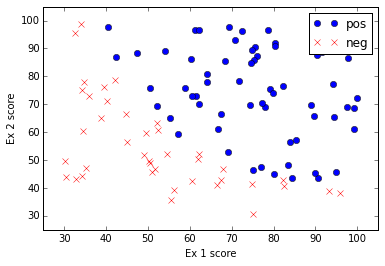

In [56]:
plt.plot(X[pos,0],X[pos,1],'bo')
plt.plot(X[neg,0],X[neg,1],'rx')
plt.axis([25,105,25,105])
plt.legend(['pos','neg'])
plt.xlabel('Ex 1 score')
plt.ylabel('Ex 2 score')

# Fit with sci-kit learn

In [24]:
from sklearn.linear_model import LogisticRegression

In [35]:
# w/o regularization
clf = LogisticRegression(C=10000000)

In [36]:
clf.fit(X,y)

LogisticRegression(C=10000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)

In [37]:
clf.score(X,y)

0.89000000000000001

In [38]:
# L1 and L2 regularized logistic regression
# One can dismiss regularization effect with a large value of C

clf1 = LogisticRegression(C=1., penalty='l1')
clf2 = LogisticRegression(C=1., penalty='l2')

In [39]:
clf1.fit(X,y)
clf2.fit(X,y)
clf1.score(X,y), clf2.score(X,y)

(0.91000000000000003, 0.87)

# Plot decision boundary

In [42]:
u = np.arange(25,100,1)
v = np.arange(25,100,1)

In [44]:
uu,vv = np.meshgrid(u,v)

In [46]:
X_pre = np.column_stack((uu.ravel(),vv.ravel()))

In [50]:
z_pre = clf.predict_proba(X_pre)[:,0]
z_pre1 = clf1.predict_proba(X_pre)[:,0]
z_pre2 = clf2.predict_proba(X_pre)[:,0]

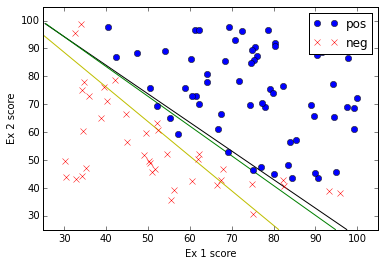

In [55]:
plt.plot(X[pos,0],X[pos,1],'bo')
plt.plot(X[neg,0],X[neg,1],'rx')
plt.axis([25,105,25,105])
plt.contour(u,v,z_pre.reshape(75,75),[0.5],colors='black')  # w/o regularization
plt.contour(u,v,z_pre1.reshape(75,75),[0.5],colors='g')  # l1 
plt.contour(u,v,z_pre2.reshape(75,75),[0.5],colors='y')  # l2
plt.legend(['pos','neg'])
plt.xlabel('Ex 1 score')
plt.ylabel('Ex 2 score')